In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/income_evaluation.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8965 entries, 0 to 8964
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              8965 non-null   int64 
 1    workclass       8965 non-null   object
 2    fnlwgt          8965 non-null   int64 
 3    education       8965 non-null   object
 4    education-num   8965 non-null   int64 
 5    marital-status  8965 non-null   object
 6    occupation      8965 non-null   object
 7    relationship    8965 non-null   object
 8    race            8965 non-null   object
 9    sex             8965 non-null   object
 10   capital-gain    8965 non-null   int64 
 11   capital-loss    8965 non-null   int64 
 12   hours-per-week  8965 non-null   int64 
 13   native-country  8965 non-null   object
 14   income          8964 non-null   object
dtypes: int64(6), object(9)
memory usage: 1.0+ MB


In [4]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,8965.000000,8.965000e+03,8965.000000,8965.000000,8965.000000,8965.000000
mean,38.442722,1.902449e+05,10.076297,1070.066815,89.187730,40.547909
std,13.574919,1.060791e+05,2.543592,7341.281254,404.037313,12.325320
min,17.000000,1.930200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.179270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.786150e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.384150e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.226583e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.shape

(8965, 15)

In [6]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [7]:
df[" income"].value_counts()

 income
 <=50K    6822
 >50K     2142
Name: count, dtype: int64

In [8]:
df.isnull().any()

age                False
 workclass         False
 fnlwgt            False
 education         False
 education-num     False
 marital-status    False
 occupation        False
 relationship      False
 race              False
 sex               False
 capital-gain      False
 capital-loss      False
 hours-per-week    False
 native-country    False
 income             True
dtype: bool

In [9]:
df.dtypes

age                 int64
 workclass         object
 fnlwgt             int64
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 income            object
dtype: object

In [10]:
Target=df[" income"].value_counts()|len(df)
Target

 income
 <=50K    15271
 >50K     11103
Name: count, dtype: int64

<BarContainer object of 2 artists>

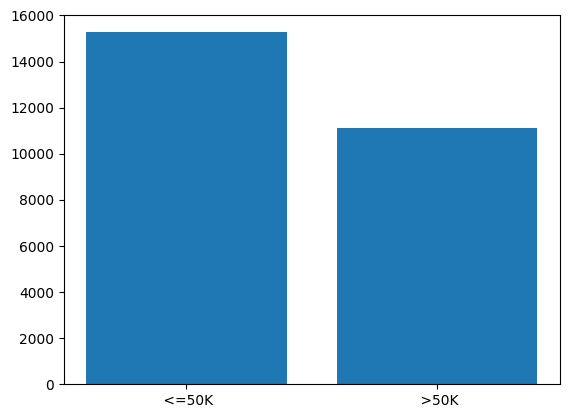

In [11]:
plt.bar(Target.index,Target)

In [12]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df[" income"]=lb.fit_transform(df[" income"])

In [13]:
categorical_data=df.columns[df.dtypes=="O"]
print(*categorical_data,sep=" | ")

 workclass |  education |  marital-status |  occupation |  relationship |  race |  sex |  native-country


In [14]:
new_df=pd.get_dummies(df,columns=categorical_data)
new_df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ Uni,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
x=new_df

In [16]:
y=new_df[" income"]

In [17]:
print(x.shape,y.shape)

(8965, 109) (8965,)


In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [19]:
x_train.shape

(7172, 109)

In [20]:
y_train.shape

(7172,)

In [21]:
x_test.shape

(1793, 109)

In [22]:
y_test.shape

(1793,)

In [23]:
from sklearn.naive_bayes import GaussianNB
Gnb= GaussianNB()
Gnb.fit(x_train,y_train)

GaussianNB()

In [24]:
pred=Gnb.predict(x_test)
print(pred)

[0 0 0 ... 0 0 0]


In [25]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(pred,y_test)
accuracy

0.7880646960401562

In [26]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)
cm

array([[1291,   66],
       [ 314,  122]])

<Axes: >

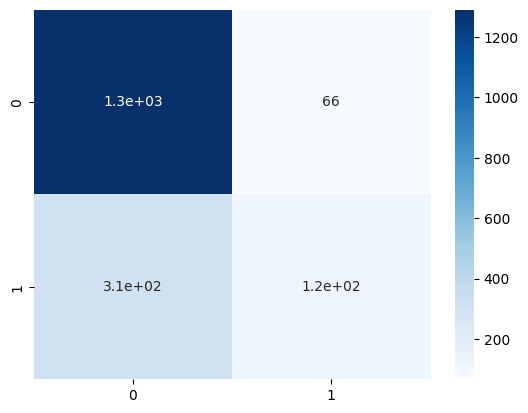

In [27]:
sns.heatmap(cm,annot=True,cmap="Blues")

In [28]:
from sklearn.naive_bayes import BernoulliNB
Bnb=BernoulliNB()
Bnb.fit(x_train,y_train)

BernoulliNB()

In [29]:
pred_1=Bnb.predict(x_test)
print(pred)

[0 0 0 ... 0 0 0]


In [30]:
from sklearn.metrics import accuracy_score
accuracy_1=accuracy_score(pred_1,y_test)
accuracy_1

0.9983268265476855

In [31]:
from sklearn.metrics import accuracy_score
accuracy_1=accuracy_score(pred_1,y_test)
accuracy_1

0.9983268265476855

In [32]:
from sklearn.metrics import confusion_matrix
cm_1=confusion_matrix(y_test,pred_1)
cm_1

array([[1356,    1],
       [   2,  434]])

<Axes: >

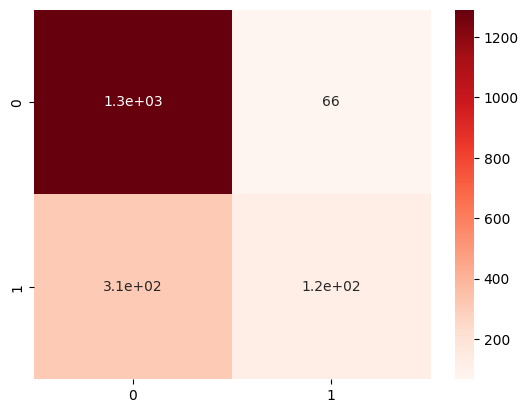

In [33]:
sns.heatmap(cm,annot=True,cmap="Reds")

<BarContainer object of 2 artists>

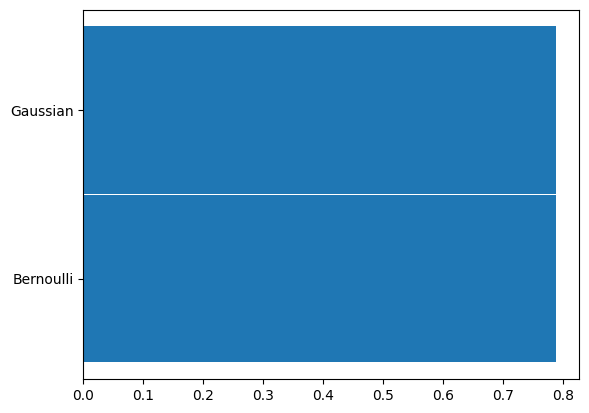

In [34]:
plt.barh(["Bernoulli","Gaussian"],accuracy,accuracy_1)

In [35]:
from sklearn.naive_bayes import MultinomialNB
Mnb=MultinomialNB()
Mnb.fit(x_train,y_train)

MultinomialNB()

In [36]:
pred_2=Mnb.predict(x_test)
print(pred_2)

[2 2 2 ... 2 2 2]


In [37]:
from sklearn.metrics import accuracy_score
accuracy_2=accuracy_score(pred_2,y_test)
accuracy_2

0.09202453987730061

In [38]:
from sklearn.metrics import confusion_matrix
cm_2=confusion_matrix(y_test,pred_2)
cm_2

array([[  75,   64, 1218],
       [  38,   90,  308],
       [   0,    0,    0]])

<Axes: >

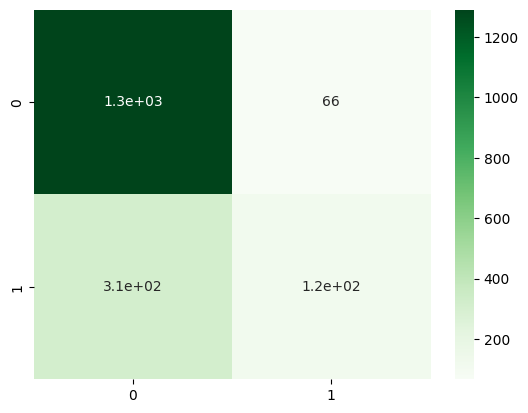

In [39]:
sns.heatmap(cm,annot=True,cmap="Greens")

<BarContainer object of 3 artists>

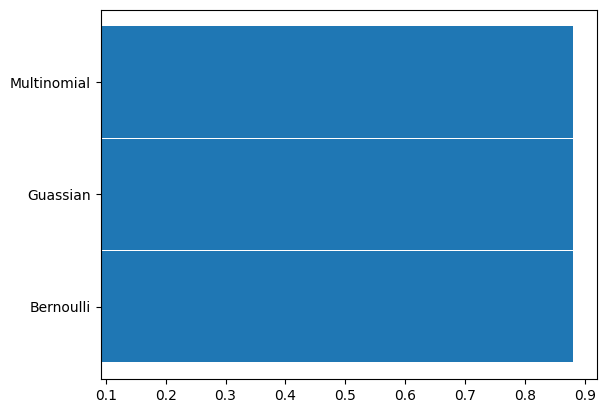

In [40]:
plt.barh(["Bernoulli","Guassian","Multinomial"],accuracy,accuracy_1,accuracy_2)